In [1]:
# -*- coding: UTF-8 -*-

# Render our plots inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import shutil

pd.set_option('display.max_columns', None) # Display all the columns

sns.set()
#sns.set_style("whitegrid") # Seaborn style


In [3]:
data = pd.read_csv("csv/results.csv")

In [4]:
profile = data["Q12"].str.strip().fillna(value="No answer").value_counts(dropna=False)
profile_percentage = data["Q12"].str.strip().fillna(value="No answer").value_counts(normalize=True, dropna=False) * 100

order = [
    "Yes",
    "No, it’s a secondary professional activity",
    "No, it’s just a hobby",
    "No answer"
]
profile = profile.reindex(order).fillna(value=0)
profile_percentage = profile_percentage.reindex(order).fillna(value=0)

print "Data:"
print profile
print ""
print "Data %:"
print profile_percentage

Data:
Yes                                           1
No, it’s a secondary professional activity    3
No, it’s just a hobby                         3
No answer                                     1
Name: Q12, dtype: int64

Data %:
Yes                                           12.5
No, it’s a secondary professional activity    37.5
No, it’s just a hobby                         37.5
No answer                                     12.5
Name: Q12, dtype: float64


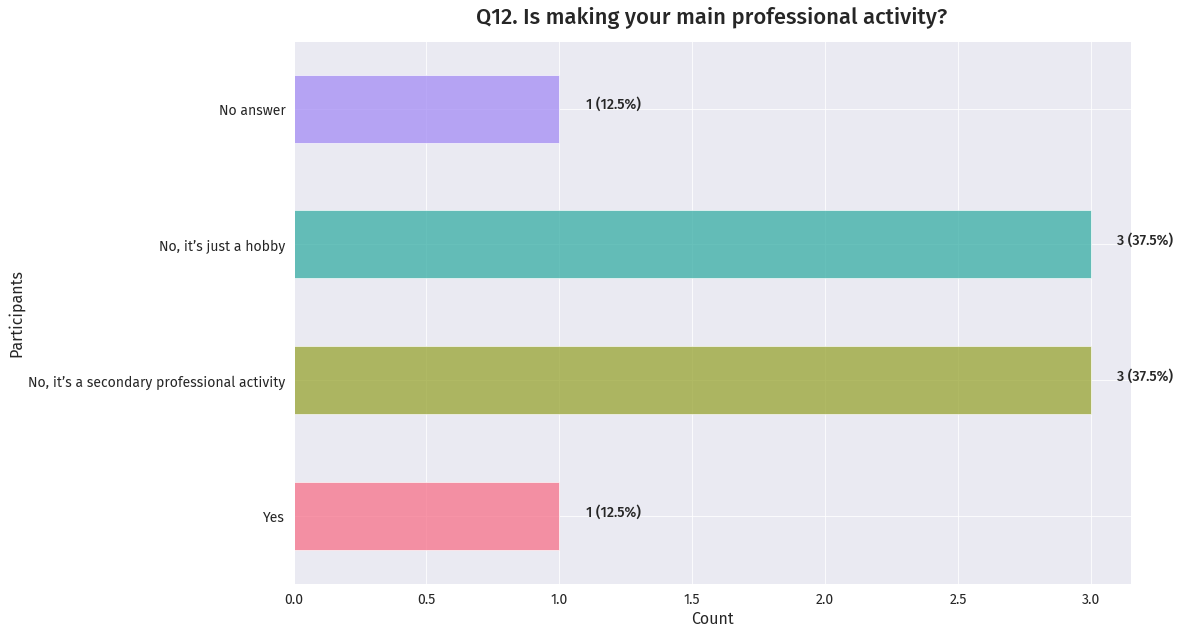

In [5]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper")
# Plot the data
plt.figure(figsize=(8,6))
plt.xlabel('Count', fontsize=16)
plt.ylabel('Participants', fontsize=16)
plt.title("Q12. Is making your main professional activity?", fontsize=22, y=1.02, fontname='Fira Sans', fontweight="500")
my_colors = sns.color_palette("husl", len(profile)) # Set color palette
profile.plot(kind='barh', color=my_colors, alpha=0.75, rot=0, figsize=(15,10))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
for i, v in enumerate(profile):
    plt.text(v + .1, i, str(v)+" ("+str(profile_percentage[i])+"%)", fontweight='500', fontsize=14)
plt.savefig("svg/Q12.svg", bbox_inches="tight")
plt.savefig("png/Q12.png", dpi=300, bbox_inches="tight")